In [2]:
import pandas as pd                  # pandas lib is used for tabular data preprocessing and cleaning
import seaborn as sns                # seaborn lib is used for drawing visualizations for the data
from matplotlib import pyplot as plt # matplotlib lib is used for drawing visualizations for the data
import warnings                      # filterwarnings is used for filtering and supressing any warnings during the data cleaning
warnings.filterwarnings('ignore')    # process

In [8]:
dataframe = pd.read_csv('C:/Users/HP\Desktop/Krishna Domestic food/Domestic Food Prices.csv') # pd.read_csv is used for
                                        # reading the tabular data into python pandas
dataframe # viewing the data frame

,Unnamed: 0,country,price_type,market,commodity,percent,post_covid,yearly
0,0,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,NaN,-0.061538,-0.031746
1,1,Cameroon,Retail,YaundÃ©,Bananas (plantains),NaN,0.000000,0.000000
2,2,Cameroon,Retail,Bafoussam,Bananas (plantains),NaN,-0.305556,0.041667
3,3,Morocco,Retail,National Average,Barley (imported),NaN,-0.034483,-0.034483
4,4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),NaN,0.769231,0.232143
...,...,...,...,...,...,...,...,...
1139,1139,Benin,Retail,Parakou,Yam,NaN,0.057143,0.027778
1140,1140,Benin,Retail,Natitingou,Yam,NaN,0.088235,0.057143
1141,1141,Benin,Retail,Cotonou,Yam,NaN,0.057692,0.100000
1142,1142,Ghana,Wholesale,Tamale,Yam,NaN,-0.090909,0.000000


In [9]:
# re.split('[^a-zA-Z]*', x will extractand split only alphabets and they are joined
import re
dataframe['market'] = dataframe['market'].apply(lambda x: "".join(re.split('[^a-zA-Z]*', x)))
# The given code snippet cleans up the 'market' column in a pandas DataFrame df 
# by removing any non-alphabetic characters from the values.

In [10]:
# This code removes the column labeled 'Unnamed: 0' from the DataFrame dataframe. 
dataframe.drop('Unnamed: 0', axis = 1,inplace = True)

In [11]:
# This code removes the column labeled 'percent' from the DataFrame dataframe. 
dataframe.drop('percent', axis = 1, inplace = True) # drop function is used to delete a particular column in the dataframe

In [12]:
# This code calculates the difference between the values in the 'post_covid' column and 
# the 'yearly' column of the DataFrame dataframe, and stores the result in a new column called 'differ'.
dataframe['differ'] = dataframe['post_covid'] - dataframe['yearly'] # creating a new feature that contains the difference values

In [13]:
# This code snippet uses scikit-learn's LabelEncoder to encode categorical 
# columns in the DataFrame df ('country', 'market', 'commodity', 'price_type') into numerical values. 
from sklearn.preprocessing import LabelEncoder # label encoding to encode the categorical column
enc = LabelEncoder()
dataframe['country'] = enc.fit_transform(dataframe['country'])
dataframe['market'] = enc.fit_transform(dataframe['market'])
dataframe['commodity'] = enc.fit_transform(dataframe['commodity'])
dataframe['price_type'] = enc.fit_transform(dataframe['price_type'])
#df[''] = enc.fit_transform(df[''])

In [14]:
# The code separates a DataFrame into input features (excluding 'price_type') and output target ('price_type'), 
# then prints the shapes of the original data, inputs, and outputs.
inputs = dataframe.drop('price_type', axis = 1) # defining inputs and outputs to model
outputs = dataframe['price_type']
print('the shape of the data is', dataframe.shape)
print('the shape of inputs is', inputs.shape)
print('the shape of outputs is', outputs.shape)

the shape of the data is (1144, 7)
the shape of inputs is (1144, 6)
the shape of outputs is (1144,)


In [15]:
# The code splits input features (inputs) and target variable (outputs) into 
# training and test sets (X_train, X_test, y_train, y_test), then prints the shapes of the training and test sets
from sklearn.model_selection import train_test_split # dividing the data set into trainig and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30, random_state=1)

# checking the shape of training and test data set
print('The shape of X_train', X_train.shape)
print('The shape of X_test' , X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test' , y_test.shape)

The shape of X_train (800, 6)
The shape of X_test (344, 6)
The shape of y_train (800,)
The shape of y_test (344,)


In [17]:
# The code performs logistic regression using scikit-learn. It creates a LogisticRegression model, 
# trains it on the training data, predicts on the test data, and generates a classification report 
# for evaluating the model's performance.
from sklearn.linear_model import LogisticRegression ## Logistic Regression
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)                         # training the model
# Prediction using Logistic regression
y_pred_log_reg = log_reg_clf.predict(X_test)            # predicting 
# score
from sklearn.metrics import classification_report         # classification report
clf_rpt_log_reg = classification_report(y_test, y_pred_log_reg)
print('classification report for logistic regression \n',clf_rpt_log_reg )


classification report for logistic regression 
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       246
           1       0.20      0.02      0.04        98

    accuracy                           0.70       344
   macro avg       0.46      0.49      0.43       344
weighted avg       0.57      0.70      0.60       344



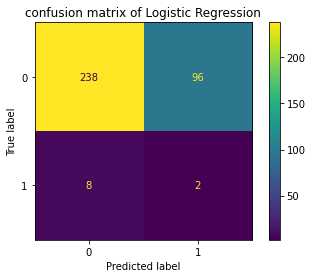

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(y_pred_log_reg, y_test, labels = log_reg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=log_reg_clf.classes_)
disp.plot()
plt.title('confusion matrix of Logistic Regression')
plt.show()

### Decision boundary
* 'https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07'
* 'https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html'

In [ ]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [ ]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# X is independent variable with 2 columns and 1000 rows
# y is dependent variable with 1000 rows

In [ ]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1  # min value in 1st column and max value in first column
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1  # min value in 2nd column and max value in second columns

In [ ]:
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

In [ ]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [ ]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [ ]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

In [ ]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)

In [ ]:
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

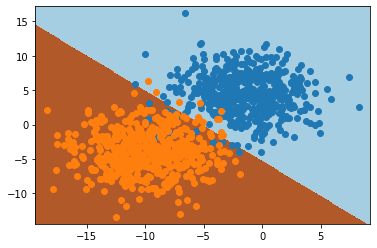

In [19]:
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')